In [11]:
%matplotlib inline
import h5py
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

sns.set_theme('notebook', style='whitegrid', palette='muted', font_scale=1.25)

In [28]:
base_path = Path(os.path.dirname(os.getcwd())) / 'bes-edgeml-models/turbulence_regime_classification/'
labeled_data = Path(base_path) / 'data/labeled_datasets'

In [29]:
hf = h5py.File(labeled_data / 'bes_signals_149995_labeled.hdf5', 'r')

In [30]:
np.array([d for d in hf])

array(['labels', 'signals', 'time'], dtype='<U7')

In [31]:
signals = np.array(hf['signals'], dtype=np.float32)
signals.shape

(64, 5242880)

In [32]:
times = np.array(hf['time'])
times

array([ 800.   ,  800.001,  800.002, ..., 6042.877, 6042.878, 6042.879])

In [33]:
t_shifted = (times - 800.000).astype(float)
t_shifted

array([0.000000e+00, 1.000000e-03, 2.000000e-03, ..., 5.242877e+03,
       5.242878e+03, 5.242879e+03])

In [34]:
labels = np.array(hf['labels'], dtype=np.int32)
labels.shape

(5242880,)

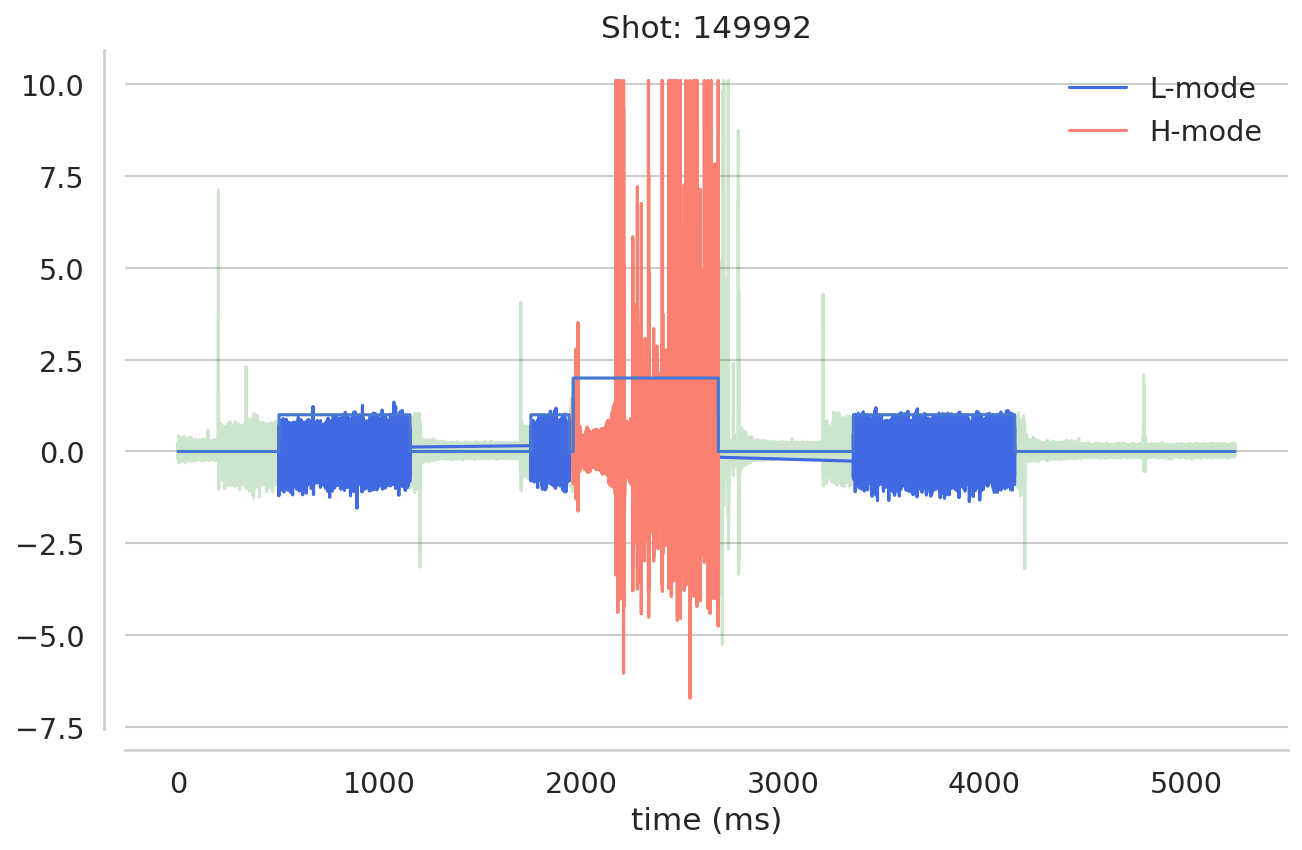

In [37]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(t_shifted, signals[21, :], c='green', alpha=0.2)
plt.plot(t_shifted[labels == 1], signals[21, labels == 1], label='L-mode', c='royalblue')
plt.plot(t_shifted[labels == 2], signals[21, labels == 2], label='H-mode', c='salmon')
plt.plot(t_shifted, labels)
plt.legend(frameon=False)
plt.title('Shot: 149995')
plt.xlabel('time (ms)')
sns.despine(top=True, right=True, offset=10)
plt.grid(axis='x')
plt.show()